In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class SimpleExpo():
    
    def __init__(self,n,t,alpha):
        self.periods = n
        self.period = t
        self.demand_data = ['Dt']
        self.alpha = alpha
        self.level = {}
        self.forecast = {}
        self.forecast_error = {}
        self.mean_squared_error = 'unknown'
        self.mean_absolute_deviation = 'unknown'
        self.std = 'unknown'
        
    def add_demand_data(self):
        self.demand_data += list(map(float,input().split()))
        
    def perform_analysis(self):
        
        n = self.periods
        t = self.period
        Dt = self.demand_data
        alpha = self.alpha
        Lt = self.level
        Ft = self.forecast
        Et = self.forecast_error
        
        L0 = round(sum(Dt[1:n+1])/n,3)
        Lt['L0'] = L0
        
        for i in range(1,t+1):
            Ft['F'+str(i)] = Lt['L'+str(i-1)]
            if(i == t):
                break
            else:
                Et['E'+str(i)] = round(Ft['F'+str(i)] - Dt[i],3)
                Lt['L'+str(i)] = round(alpha*Dt[i] + (1-alpha)*Lt['L'+str(i-1)],3)
        
        self.mean_squared_error = sum([i**2 for i in Et.values()])/n
        self.mean_absolute_deviation = sum([abs(i) for i in Et.values()])/n
        self.std = 1.25*self.mean_absolute_deviation
        
        print('Analysis Complete')

------------------------------

# Examples

<b>Example - 1</b>
Develop a forecast for the following data using simple exponential smoothing with an alpha of 0.66. Then calculate MAD & MSE.
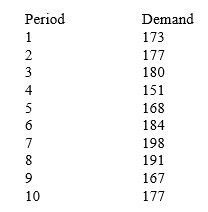

In [3]:
s1 = SimpleExpo(10,11,0.66)

In [4]:
s1.alpha

0.66

In [5]:
s1.period

11

In [6]:
s1.periods

10

In [7]:
s1.demand_data

['Dt']

In [8]:
s1.forecast

{}

In [9]:
s1.forecast_error

{}

In [10]:
s1.level

{}

In [11]:
s1.add_demand_data()

173 177 180 151 168 184 198 191 167 177


In [12]:
s1.perform_analysis()

Analysis Complete


In [13]:
s1.level

{'L0': 176.6,
 'L1': 174.224,
 'L2': 176.056,
 'L3': 178.659,
 'L4': 160.404,
 'L5': 165.417,
 'L6': 177.682,
 'L7': 191.092,
 'L8': 191.031,
 'L9': 175.171,
 'L10': 176.378}

In [14]:
s1.forecast

{'F1': 176.6,
 'F2': 174.224,
 'F3': 176.056,
 'F4': 178.659,
 'F5': 160.404,
 'F6': 165.417,
 'F7': 177.682,
 'F8': 191.092,
 'F9': 191.031,
 'F10': 175.171,
 'F11': 176.378}

In [15]:
s1.forecast_error

{'E1': 3.6,
 'E2': -2.776,
 'E3': -3.944,
 'E4': 27.659,
 'E5': -7.596,
 'E6': -18.583,
 'E7': -20.318,
 'E8': 0.092,
 'E9': 24.031,
 'E10': -1.829}

In [16]:
s1.mean_squared_error

219.7932488

In [17]:
s1.mean_absolute_deviation

11.042799999999998

In [18]:
s1.std

13.803499999999998

-------------------------

<b>Example - 2</b>
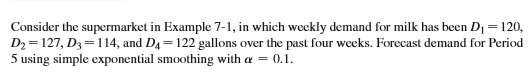

In [19]:
s2 = SimpleExpo(4,5,0.1)

In [20]:
s2.add_demand_data()

120 127 114 122


In [21]:
s2.perform_analysis()

Analysis Complete


In [22]:
s2.level

{'L0': 120.75, 'L1': 120.675, 'L2': 121.308, 'L3': 120.577, 'L4': 120.719}

In [23]:
s2.forecast

{'F1': 120.75, 'F2': 120.675, 'F3': 121.308, 'F4': 120.577, 'F5': 120.719}

In [24]:
s2.forecast_error

{'E1': 0.75, 'E2': -6.325, 'E3': 7.308, 'E4': -1.423}

In [25]:
s2.mean_squared_error

23.9999795

In [26]:
s2.mean_absolute_deviation

3.9515

In [27]:
s2.std

4.939375

--------------------END--------------------

# References
1. Supply Chain Management - Strategy, Planning & Operation, Sunil Chopra, Peter Meindl, 6th Edition.